## 8 Bootstrap

For estimating standard errors and confidence intervals.   

Let $T_n=g(X_1,X_2,...,X_n)$ be a statistic, suppose we want to know $\mathbb{V}_F(T_n)$, the subscript $F$ says the variance depends on the unknown distribution function $F$. For example $T_n=\overline{X}_n=\frac{1}{n}\sum{X_i}$.  

$\textbf {Q: Why can't we just use plug-in method for variance and confidence intervals?}$  

The bootstrap has two steps:  
1. Estimate $\mathbb{V}_F(T_n)$ with $\mathbb{V}_{\hat{F}_n}(T_n)$  
2. Approximate $\mathbb{V}_{\hat{F}_n}(T_n)$ using simulation. 

For $T_n=\overline{X}_n=\frac{1}{n}\sum{X_i}$, we have for step 1 that $\mathbb{V}_{\hat{F}_n}(T_n)=\hat{\delta}^2/n$ where $\hat{\delta}^2=\frac{1}{n}\sum_{i=1}{n}(X_i-\overline{X}_n)^2$, there is no need for step 2.  However more complicated cases are when no simple formula for $\mathbb{V}_{\hat{F}_n}(T_n)$, which is why step 2 is needed.  

### 8.1 Simulation

By LLN, as $B \longrightarrow \infty$,
$$
\overline{Y}_n=\frac{1}{B}\sum_{j=1}^B Y_j \overset{P}{\longrightarrow} \int ydG(y)=\mathbb{E}(Y) \\
\frac{1}{B}\sum_{j=1}^B h(Y_j) \overset{P}{\longrightarrow} \int h(y)dG(y)=\mathbb{E}(h(Y))
$$

In particular when $h(Y_j)=(Y_j-\overline{Y})^2$, it's easy to derive that 
$$
\frac{1}{B}\sum_{j=1}^B h(Y_j) \overset{P}{\longrightarrow} \mathbb{V}(Y) 
$$
Which means we can use the sample variance to approximate $\mathbb{V}(Y)$.


### 8.3 Bootstrap Variance Estimation

Three terminologies: Estimation, Approximation and Simulation, they describe things in different aspects of views:
1. Estimation is used to attempt to find the true statistic or CDF (or parameter $\theta$), but since the true values are impossible to be found, we use an estimation for them instead. (Generally it is denoted as $\hat{F}$ or $\hat{\theta}$.)   
2. Approximation is used in the context of nonparametric estimation, in which the statistic or CDF (or parameters ?) to be estimated cannot be written as a function mapping (think about all the well-known distributions such as Gaussian, Poisson, multinomial, etc, their distribution can all be denoted as a function.)  
3. Simulation is a way of approximation, it is used in the context of Bootstrap, essentially it uses the LLN to approximate an estimation from a(large) number of samples.   

Simulate from the distribution of $T_n$ which is just $F_n$ from the data which is assumed to have distribution $\hat{F}_n$, and then compute $T_n^*=g(X_1^*,X_2^*,... X_n^*)$. The simulated samples $X_1^*,X_2^*,... X_n^*$ constitute one draw from the distribution of $T_n$.  

Real world: $F \Rightarrow X_1,X_2,... X_n \Rightarrow T_n=g(X_1,X_2,... X_n)$   
Bootstrap world: $\hat{F} \Rightarrow X_1^*,X_2^*,... X_n^* \Rightarrow T_n^*=g(X_1^*,X_2^*,... X_n^*)$   

Each of the observation in this draw is at random fro mthe original dataset. The bootstrap is just to make $B$ draws and average over.  



#### Bootstrap Variance Estimation
1. Draw $X_1^*,X_2^*,... X_n^* \sim \hat{F}_n$    
2. Compute $T_n^* = g(X_1^*,X_2^*,... X_n^*)$    
3. Repeat steps 1 and 2 for B times to get $T_{n,1}^*,T_{n,2}^*,...,T_{n,B}^*$
4. Let $ v_{boot}=\frac{1}{B}\sum_{b=1}^B \left( T_{n,b}^* - \frac{1}{B}\sum_{r=1}^B T_{n,r} \right )^2 $


#### 8.1 Example Bootstrap Variance of Median

<IPython.core.display.Javascript object>


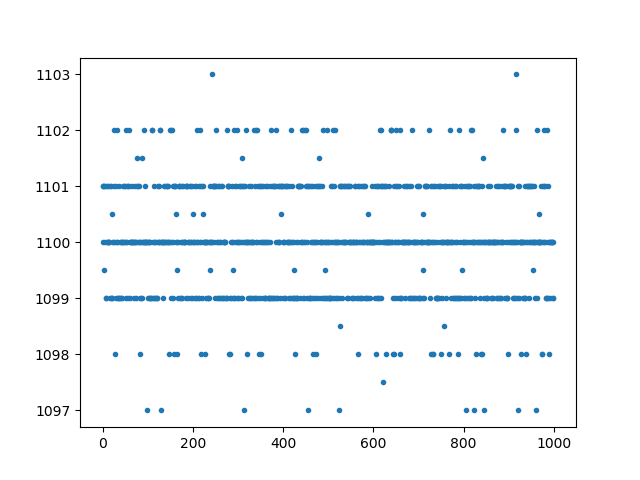

0.9778648935307985


In [76]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

#### Bootstrap SE of Median Estimation
# estimate the standard error of the median
def bsMedianSE(X, B):
    T = np.median(X)
    n = len(X)
    TBoot = np.zeros(B)
    for i in range(B):
        XStar = np.random.choice(X,n)
        TBoot[i] = np.median(XStar)
    
    x = np.arange(B)
    plt.plot(x, TBoot, '.', linewidth=2)
    se = np.sqrt(np.var(TBoot))
    return se

Len = 10000
B = 1000
X = np.random.randint(1000, 1200, size=Len)
V = bsMedianSE(X, B)
print(V)

#### 8.2 Example Bootstrap skewness from the nerve data
Cox and Lewis (1966)

### 8.3 Bootstrap Confidence Intervals

Three methods discussed here.
1. The Normal Interval: from the approximated standard error directly. Not accurate unless $T_n$ is close to Normal.
$$
T_n \pm z_{\alpha/2}\hat{se}_{boot}
$$  


2. Pivotal Intervals. Let $\theta=T(F)$ and $\hat{\theta}_n=T(\hat{F}_n)$ and define the $\textbf{pivot}: R_n=\hat{\theta}_n-\theta$. Let $\theta_{n,1}^*,...,\theta_{n,B}^*$ denote bootstrap replications of $\hat{\theta}_n$. Let $H(r)$ denote the CDF of the pivot: 
$$
H(r)=\mathbb{P}(R_n\le r)
$$
Define $C_n^*=(a,b)$ where 
$$
a=\hat{\theta}_n-H^{-1}(1-\frac{\alpha}{2}) \space \text{and} \space b=\hat{\theta}_n-H^{-1}(\frac{\alpha}{2})
$$
It follows that
$$
\begin{eqnarray*}
\mathbb{P}(a \le \theta \le b) &=& \mathbb{P}(a-\hat{\theta}_n \le \theta-\hat{\theta}_n \le b-\hat{\theta}_n) \\
&=& \mathbb{P}(a-\hat{\theta}_n \le -R_n \le b-\hat{\theta}_n) \\
&=& H(\hat{\theta}_n - a) - H(\hat{\theta}_n - b) \\
&=& H(H^{-1}(1-\frac{\alpha}{2}))-H(H^{-1}(\frac{\alpha}{2})) \\
&=& 1-\alpha
\end{eqnarray*}
$$
Remember the two definitions: $\textbf{pivot}$ and it's confidence interval. By forming a bootstrap estimate of $H$:
$$
\hat{H}(r)=\frac{1}{B}\sum_{i=1}^B I(R_{n,b}^*\le r)
$$
where $R_{n,b}^*=\hat{\theta}_{n,b}^*-\hat{\theta}_n$. Let $r_\beta^*$ denote the $\beta$ quantile of $(R_{n,1}^*,...,R_{n,B}^*)$ and $\theta_\beta^*$ denote the $\beta$ quantile of $(\hat{\theta}_{n,1}^*,...,\hat{\theta}_{n,B}^*)$, note that $r_\beta^*=\theta_\beta^* - \hat{\theta}_n$. It follows that an approximate $1-\alpha$ confidence interval is $C_n=(\hat{a},\hat{b})$ where
$$
\hat{a}=\hat{\theta}_n-H^{-1}(1-\frac{\alpha}{2})=\hat{\theta}_n-r_{1-\alpha/2}^*=2\hat{\theta}_n-\theta_{1-\alpha/2}^* \\
\hat{b}=\hat{\theta}_n-H^{-1}(\frac{\alpha}{2})=\hat{\theta}_n-r_{\alpha/2}^*=2\hat{\theta}_n-\theta_{\alpha/2}^* 
$$


3. Percentile Intervals. The $\textbf{bootstrap percentile interval}$ is defined by
$$
C_n=\left(\theta_{\alpha/2}^*, \theta_{1-\alpha/2}^* \right)
$$


#### 8.3 Theorem
Under weak conditions on $T(F)$,
$$
\mathbb{P}_F(T(F)\in C_n)\rightarrow 1-\alpha
$$
as $n\rightarrow \infty$ where $C_n$ is given above.

#### 8.4 Example (Nerve Data)

#### 8.5 Example (The Plasma Cholesterol Data)


#### 8.6 Example (LSAT scores and GPA)

#### 8.7 Example (Efron and Tibshirani (1993))
